In [59]:
# importing all the packages and naming them as per our convinience
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
import warnings
warnings.filterwarnings('ignore')

In [15]:
# create an empty list to load review text data
Asus_laptop=[]

In [16]:
# Extracting the user reviews text into the created list
for i in range (1,50):
    asus=[]
    url ="https://arcus-www.amazon.in/ASUS-RTX-3060-Battery-Windows-FA506QM-HN124W/product-reviews/B09Y695S7K/"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        asus.append(reviews[i].text)
    Asus_laptop = Asus_laptop+asus

In [17]:
Asus_laptop_reviews = list(set(Asus_laptop))
Asus_laptop_reviews

['\nThis laptop is quite good in gaming and has an excellent battery life with nvidia GPU disabled.but beware being a gaming laptop it heats a lot.I tested with without a laptop cooler and it can go upto 95 degrees but when a decent laptop cooler from deepcool or cooler master is used it will drop the temps upto 77 from 95.it easily cruises at 42 degrees at idle with no fans enabled\n',
 "\nFirstly this is a gaming laptop, and you are not getting better spec wise, at this price range, at least until 2023. I am running AAA titles Horizon Zero Dawn, RDR2 and Elden Ring at Ultra without any issues. Having seen some people complain about things please see below points:-Heating :- Yes the laptop heats up when running heavy games, this is normal, the fans pump a lot of hot air out, this is not gonna win any awards for heat dissipation but it does the job. I have not experienced any thermal throttling despite gaming for 4+ hours continuously. Armory crate profile's can be set up, some come in

In [18]:
# Joining all the Reviews and making it into one sentence
txt_upd = ' '.join(Asus_laptop_reviews)

In [19]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [20]:
# seperating each word and tokenizing them
text_tokens = word_tokenize(txt_upd)

In [23]:
# removing all the stop words from the data and extending the stopwords package to remove the grammer words
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
tokens_without_sw

['laptop',
 'gaming',
 'excellent',
 'battery',
 'life',
 'nvidia',
 'gpu',
 'disabled',
 'beware',
 'gaming',
 'laptop',
 'heats',
 'lot',
 'tested',
 'laptop',
 'cooler',
 'upto',
 'degrees',
 'decent',
 'laptop',
 'cooler',
 'deepcool',
 'cooler',
 'master',
 'drop',
 'temps',
 'upto',
 'easily',
 'cruises',
 'degrees',
 'idle',
 'fans',
 'enabled',
 'firstly',
 'gaming',
 'laptop',
 'spec',
 'wise',
 'price',
 'range',
 'running',
 'aaa',
 'titles',
 'horizon',
 'zero',
 'dawn',
 'rdr',
 'elden',
 'ring',
 'ultra',
 'issues',
 'complain',
 'things',
 'points',
 'heating',
 'laptop',
 'heats',
 'running',
 'heavy',
 'games',
 'normal',
 'fans',
 'pump',
 'lot',
 'hot',
 'air',
 'gon',
 'win',
 'awards',
 'heat',
 'dissipation',
 'job',
 'experienced',
 'thermal',
 'throttling',
 'despite',
 'gaming',
 'hours',
 'continuously',
 'armory',
 'crate',
 'profile',
 'set',
 'inbuilt',
 'regulate',
 'speeds',
 'settings',
 'wifi',
 'wifi',
 'issues',
 'older',
 'networks',
 'gamer',
 'ethe

In [26]:
# TERM FREQUENCY INVERSE DOCUMNET FREQUENCY VECTORIZER
tf = TfidfVectorizer()

In [27]:
text_tf = tf.fit_transform(tokens_without_sw)

In [28]:
feature_names = tf.get_feature_names_out()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [29]:
df

,aaa,adapter,add,added,additional,air,altogether,angle,armor,armory,...,vsyn,wait,wakes,whats,wifi,win,wise,working,worth,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
word_list = ' '.join(df)

In [31]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

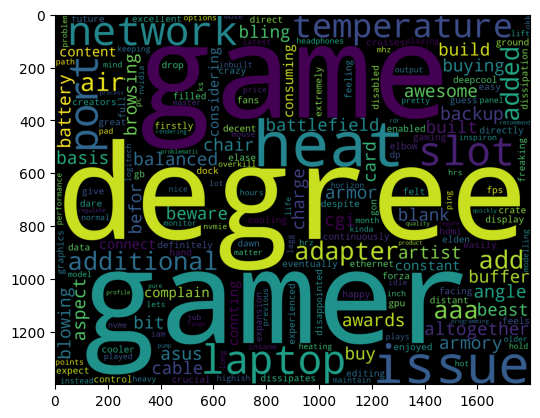

In [32]:
plt.imshow(wordcloud)

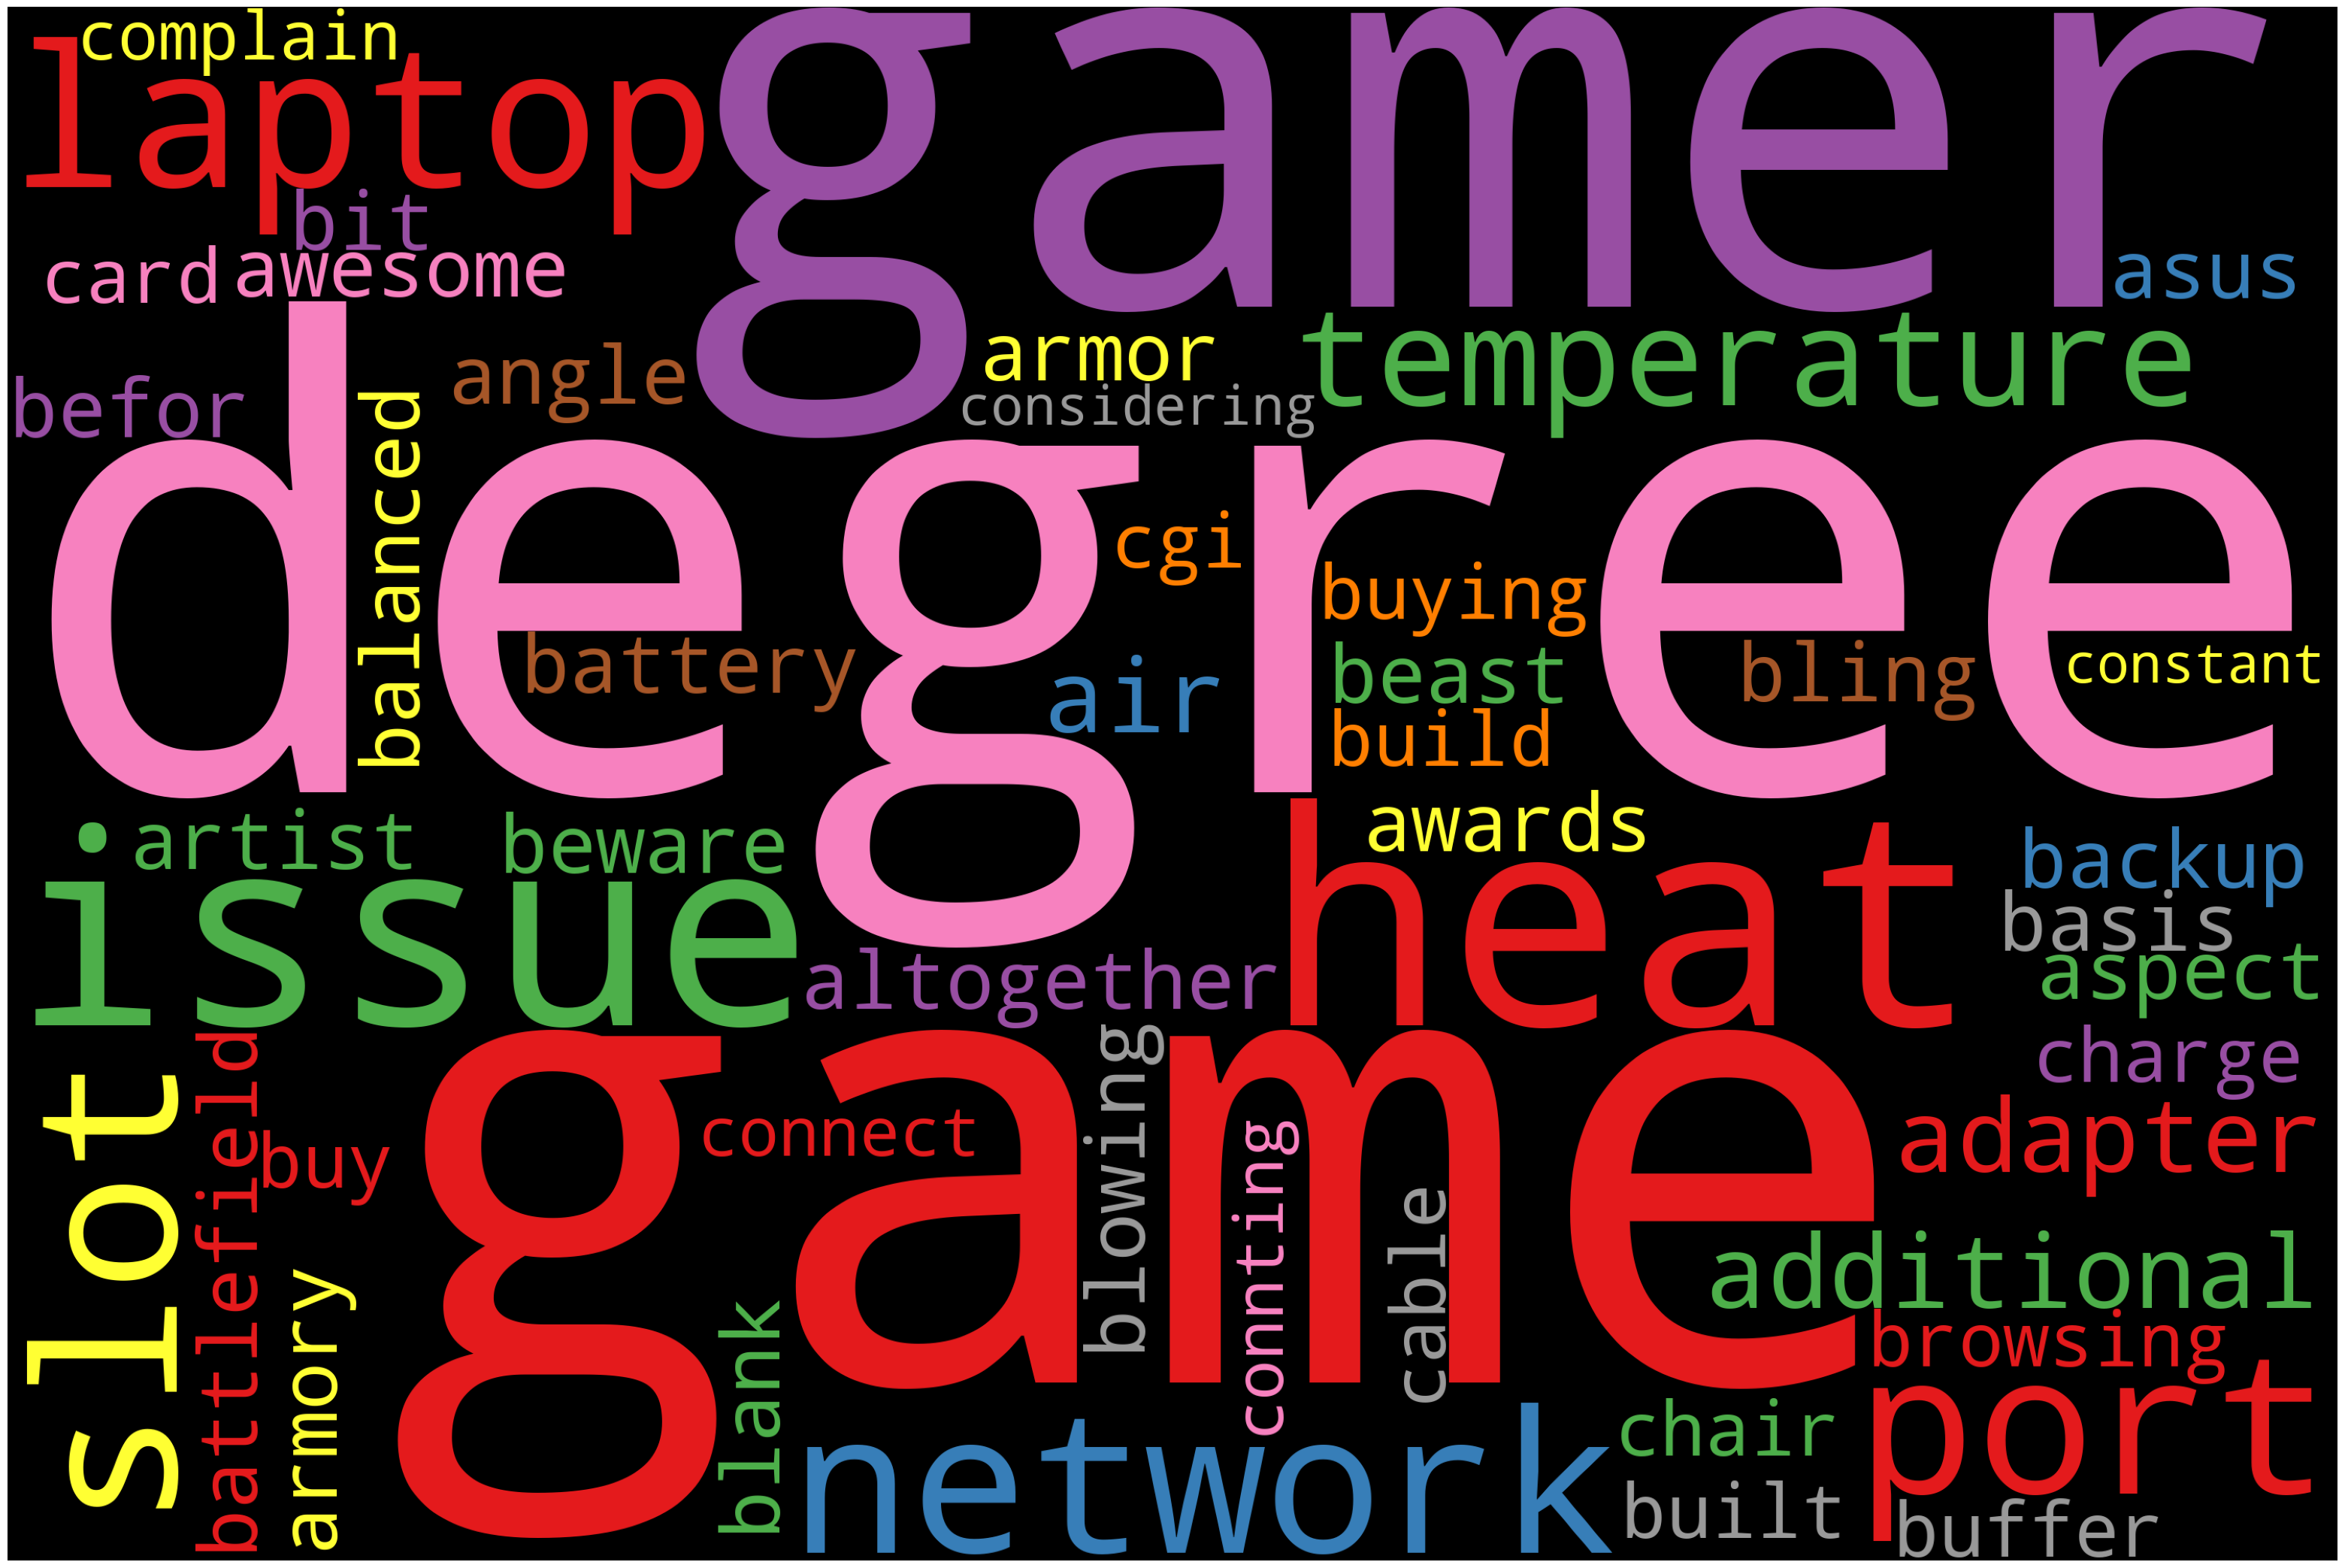

In [35]:
# size of the word in the wordcloud is totally depended upon the frequency of word
from wordcloud import WordCloud,STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
STOPWORDS.add('aaa')
STOPWORDS.add('add')
STOPWORDS.add('added')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(word_list)
plot_cloud(wordcloud)

In [38]:
Asus_laptop_reviews

['\nThis laptop is quite good in gaming and has an excellent battery life with nvidia GPU disabled.but beware being a gaming laptop it heats a lot.I tested with without a laptop cooler and it can go upto 95 degrees but when a decent laptop cooler from deepcool or cooler master is used it will drop the temps upto 77 from 95.it easily cruises at 42 degrees at idle with no fans enabled\n',
 "\nFirstly this is a gaming laptop, and you are not getting better spec wise, at this price range, at least until 2023. I am running AAA titles Horizon Zero Dawn, RDR2 and Elden Ring at Ultra without any issues. Having seen some people complain about things please see below points:-Heating :- Yes the laptop heats up when running heavy games, this is normal, the fans pump a lot of hot air out, this is not gonna win any awards for heat dissipation but it does the job. I have not experienced any thermal throttling despite gaming for 4+ hours continuously. Armory crate profile's can be set up, some come in

In [40]:
from nltk import tokenize
review = tokenize.sent_tokenize(' '.join(Asus_laptop_reviews))
review

['\nThis laptop is quite good in gaming and has an excellent battery life with nvidia GPU disabled.but beware being a gaming laptop it heats a lot.I tested with without a laptop cooler and it can go upto 95 degrees but when a decent laptop cooler from deepcool or cooler master is used it will drop the temps upto 77 from 95.it easily cruises at 42 degrees at idle with no fans enabled\n \nFirstly this is a gaming laptop, and you are not getting better spec wise, at this price range, at least until 2023.',
 'I am running AAA titles Horizon Zero Dawn, RDR2 and Elden Ring at Ultra without any issues.',
 'Having seen some people complain about things please see below points:-Heating :- Yes the laptop heats up when running heavy games, this is normal, the fans pump a lot of hot air out, this is not gonna win any awards for heat dissipation but it does the job.',
 'I have not experienced any thermal throttling despite gaming for 4+ hours continuously.',
 "Armory crate profile's can be set up, 

In [43]:
# saving the reviews in the form  of df
reviews_df = pd.DataFrame(review,columns=['Review'])
reviews_df

,Review
0,"\nThis laptop is quite good in gaming and has an excellent battery life with nvidia GPU disabled.but beware being a gaming laptop it heats a lot.I tested with without a laptop cooler and it can go upto 95 degrees but when a decent laptop cooler from deepcool or cooler master is used it will drop the temps upto 77 from 95.it easily cruises at 42 degrees at idle with no fans enabled\n \nFirstly this is a gaming laptop, and you are not getting better spec wise, at this price range, at least until 2023."
1,"I am running AAA titles Horizon Zero Dawn, RDR2 and Elden Ring at Ultra without any issues."
2,"Having seen some people complain about things please see below points:-Heating :- Yes the laptop heats up when running heavy games, this is normal, the fans pump a lot of hot air out, this is not gonna win any awards for heat dissipation but it does the job."
3,I have not experienced any thermal throttling despite gaming for 4+ hours continuously.
4,"Armory crate profile's can be set up, some come inbuilt to regulate the fan speeds and other settings.WIFI - This comes with WIFI 6, but could have issues with older 2.4 networks."
...,...
36,"I also added a 1 tb NVMIE SSD as it comes with one slot filled with the 512gb, will eventually upgrade it to 2tb +2tb Nvmie later on.Also get a good cooling pad as with any gaming laptop worth its salt temperatures will maintain a highish 90 plus but never over 98 degrees so far."
37,Get a good laptop cooler for it.
38,Battery life is respectable when considering the output.
39,Armor crate software lets you bling out the RGB settings.


In [45]:
afinnity = pd.read_csv("E:\\Text mining\\Afinn.csv", sep=",", encoding="latin-1")

In [46]:
afinnity

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [47]:
afinnity_score = afinnity.set_index('word')['value'].to_dict()
afinnity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [48]:
import spacy
nlp = spacy.load('en_core_web_sm')
sentiment = afinnity_score
def sentiment_cal (text:str=None):
    sent_score = 0
    if text:
        sentance = nlp(text)
        for word in sentance:
            sent_score+=sentiment.get(word.lemma_,0)
    return sent_score     

In [49]:
# testing the sentiment analysis
sentiment_cal(text='that is awful')

-3

In [51]:
# creating a new column in the previous data set with the sentiment value as the new column
reviews_df['sentiment_value'] = reviews_df['Review'].apply(sentiment_cal)
reviews_df

,Review,sentiment_value
0,"\nThis laptop is quite good in gaming and has an excellent battery life with nvidia GPU disabled.but beware being a gaming laptop it heats a lot.I tested with without a laptop cooler and it can go upto 95 degrees but when a decent laptop cooler from deepcool or cooler master is used it will drop the temps upto 77 from 95.it easily cruises at 42 degrees at idle with no fans enabled\n \nFirstly this is a gaming laptop, and you are not getting better spec wise, at this price range, at least until 2023.",8
1,"I am running AAA titles Horizon Zero Dawn, RDR2 and Elden Ring at Ultra without any issues.",0
2,"Having seen some people complain about things please see below points:-Heating :- Yes the laptop heats up when running heavy games, this is normal, the fans pump a lot of hot air out, this is not gonna win any awards for heat dissipation but it does the job.",10
3,I have not experienced any thermal throttling despite gaming for 4+ hours continuously.,0
4,"Armory crate profile's can be set up, some come inbuilt to regulate the fan speeds and other settings.WIFI - This comes with WIFI 6, but could have issues with older 2.4 networks.",3
...,...,...
36,"I also added a 1 tb NVMIE SSD as it comes with one slot filled with the 512gb, will eventually upgrade it to 2tb +2tb Nvmie later on.Also get a good cooling pad as with any gaming laptop worth its salt temperatures will maintain a highish 90 plus but never over 98 degrees so far.",6
37,Get a good laptop cooler for it.,3
38,Battery life is respectable when considering the output.,0
39,Armor crate software lets you bling out the RGB settings.,0


In [53]:
reviews_df['word_count'] = reviews_df['Review'].str.split().apply(len)
reviews_df

,Review,sentiment_value,word_count
0,"\nThis laptop is quite good in gaming and has an excellent battery life with nvidia GPU disabled.but beware being a gaming laptop it heats a lot.I tested with without a laptop cooler and it can go upto 95 degrees but when a decent laptop cooler from deepcool or cooler master is used it will drop the temps upto 77 from 95.it easily cruises at 42 degrees at idle with no fans enabled\n \nFirstly this is a gaming laptop, and you are not getting better spec wise, at this price range, at least until 2023.",8,94
1,"I am running AAA titles Horizon Zero Dawn, RDR2 and Elden Ring at Ultra without any issues.",0,17
2,"Having seen some people complain about things please see below points:-Heating :- Yes the laptop heats up when running heavy games, this is normal, the fans pump a lot of hot air out, this is not gonna win any awards for heat dissipation but it does the job.",10,48
3,I have not experienced any thermal throttling despite gaming for 4+ hours continuously.,0,13
4,"Armory crate profile's can be set up, some come inbuilt to regulate the fan speeds and other settings.WIFI - This comes with WIFI 6, but could have issues with older 2.4 networks.",3,32
...,...,...,...
36,"I also added a 1 tb NVMIE SSD as it comes with one slot filled with the 512gb, will eventually upgrade it to 2tb +2tb Nvmie later on.Also get a good cooling pad as with any gaming laptop worth its salt temperatures will maintain a highish 90 plus but never over 98 degrees so far.",6,55
37,Get a good laptop cooler for it.,3,7
38,Battery life is respectable when considering the output.,0,8
39,Armor crate software lets you bling out the RGB settings.,0,10


In [55]:
reviews_df[reviews_df['sentiment_value']<=0]

,Review,sentiment_value,word_count
1,"I am running AAA titles Horizon Zero Dawn, RDR2 and Elden Ring at Ultra without any issues.",0,17
3,I have not experienced any thermal throttling despite gaming for 4+ hours continuously.,0,13
6,Has 2 X M.2 NVMe 2280 slots so options to add storage is also there.I/O - 3 x USB 3.,0,20
7,"1 x HDMI, 1 x USB - C :-You can connect a USB-C dock for additional ports.",0,17
12,Looks insane too\n \nHappy that it plays the latest game which had altogether become unplayable on my previous laptop(Dell Inspiron 3543).,-2,21
...,...,...,...
31,temperatures also decent around 92 degrees.,0,6
33,!,0,1
35,"Go for the 3200 MHZ Crucial 16gb + 16gb upgrade, its definitely even more op with 32 gb.",0,18
38,Battery life is respectable when considering the output.,0,8


In [56]:
reviews_df[reviews_df['sentiment_value']>0]

,Review,sentiment_value,word_count
0,"\nThis laptop is quite good in gaming and has an excellent battery life with nvidia GPU disabled.but beware being a gaming laptop it heats a lot.I tested with without a laptop cooler and it can go upto 95 degrees but when a decent laptop cooler from deepcool or cooler master is used it will drop the temps upto 77 from 95.it easily cruises at 42 degrees at idle with no fans enabled\n \nFirstly this is a gaming laptop, and you are not getting better spec wise, at this price range, at least until 2023.",8,94
2,"Having seen some people complain about things please see below points:-Heating :- Yes the laptop heats up when running heavy games, this is normal, the fans pump a lot of hot air out, this is not gonna win any awards for heat dissipation but it does the job.",10,48
4,"Armory crate profile's can be set up, some come inbuilt to regulate the fan speeds and other settings.WIFI - This comes with WIFI 6, but could have issues with older 2.4 networks.",3,32
5,If you are a gamer you are using ethernet anyway so doesn't matter.Expansion: Comes with 2 x 8 GB sticks can upgrade them to 2 x 16 if required in the future.,1,32
8,If you want to use G-Sync you need a USB-C to DP adapter/dock to connect to supported monitor (USB-C only has direct graphics card out)I have used this for 1 month and i am happy with the product.If you want a gaming laptop and don't have enough to buy an ROG of the same spec.,7,55
...,...,...,...
32,"Its better to lift the laptop a little bit up from the ground when you are gaming.The built quality is really very great.Only thing which I felt a little problematic is the screen(Display) , Its good but not great!On overall basis the laptop is great !",9,46
34,"!and I suggest/recommend you to get it....\n \nFor editing, 3d modelling, rendering the Ryzen 9 is kinda overkill already.",2,19
36,"I also added a 1 tb NVMIE SSD as it comes with one slot filled with the 512gb, will eventually upgrade it to 2tb +2tb Nvmie later on.Also get a good cooling pad as with any gaming laptop worth its salt temperatures will maintain a highish 90 plus but never over 98 degrees so far.",6,55
37,Get a good laptop cooler for it.,3,7


<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='sentiment_value', ylabel='Density'>

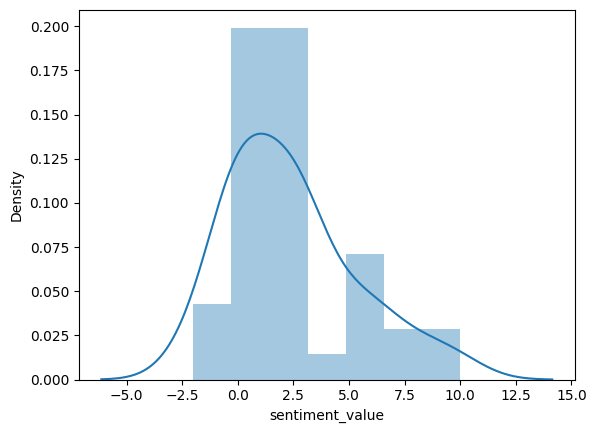

In [60]:
# plotting a dist plot on the sentiment value of the tweets
sns.distplot(reviews_df["sentiment_value"])

<AxesSubplot: xlabel='sentiment_value', ylabel='word_count'>

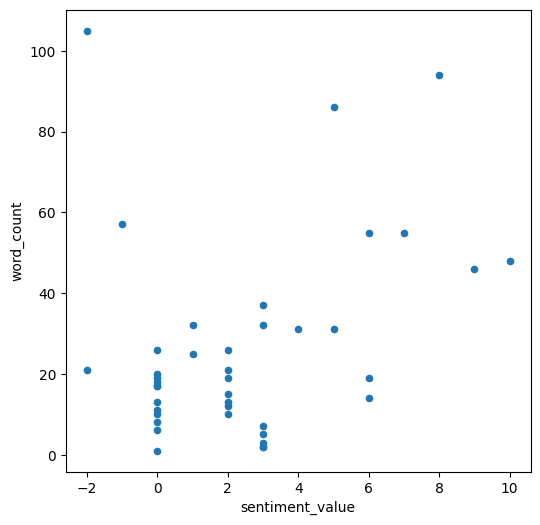

In [61]:
reviews_df.plot.scatter(x='sentiment_value',y='word_count',figsize = (6,6))